In [1]:
!pip install kagglehub

In [2]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("shayanfazeli/heartbeat")

print("Dataset path:", path)

100%|██████████| 98.8M/98.8M [00:00<00:00, 191MB/s]

Extracting files...


Dataset path: /root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1


In [3]:
import pandas as pd

train_df = pd.read_csv(path + "/mitbih_train.csv", header=None)
test_df  = pd.read_csv(path + "/mitbih_test.csv", header=None)

In [4]:
import pandas as pd

train_df = pd.read_csv("/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/mitbih_train.csv", header=None)
test_df  = pd.read_csv("/root/.cache/kagglehub/datasets/shayanfazeli/heartbeat/versions/1/mitbih_test.csv", header=None)

In [5]:
# Basic information
print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)

# First few rows
train_df.head()

Train shape: (87554, 188)
Test shape : (21892, 188)


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train_df[187].value_counts().sort_index()

,count
187,
0.0,72471
1.0,2223
2.0,5788
3.0,641
4.0,6431


In [7]:
!pip install tensorflow

In [8]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Split features and labels
X_train = train_df.iloc[:, :-1].values
y_train = train_df.iloc[:, -1].values

X_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

# Reshape for CNN 1D: (samples, timesteps, channels)
X_train = X_train.reshape(-1, 187, 1)
X_test  = X_test.reshape(-1, 187, 1)

# One-hot encoding labels (5 classes)
y_train = to_categorical(y_train, num_classes=5)
y_test  = to_categorical(y_test, num_classes=5)

X_train.shape, y_train.shape

((87554, 187, 1), (87554, 5))

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

model = Sequential([
    Conv1D(32, kernel_size=5, activation='relu', input_shape=(187, 1)),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 183, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 87, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 43, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2752)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       176,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 187,013 (730.52 KB)

 Trainable params: 187,013 (730.52 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

X = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values.astype(int)

X_tr, X_val, y_tr, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

X_tr  = X_tr.reshape(-1, 187, 1)
X_val = X_val.reshape(-1, 187, 1)

y_tr  = to_categorical(y_tr, 5)
y_val = to_categorical(y_val, 5)

In [11]:
history = model.fit(
    X_tr, y_tr,
    epochs=5,
    batch_size=128,
    validation_data=(X_val, y_val),
    verbose=1
)

Epoch 1/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.8691 - loss: 0.4886 - val_accuracy: 0.9547 - val_loss: 0.1678
Epoch 2/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9469 - loss: 0.1962 - val_accuracy: 0.9672 - val_loss: 0.1283
Epoch 3/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9560 - loss: 0.1651 - val_accuracy: 0.9697 - val_loss: 0.1130
Epoch 4/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9615 - loss: 0.1415 - val_accuracy: 0.9742 - val_loss: 0.0986
Epoch 5/5
616/616 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9637 - loss: 0.1373 - val_accuracy: 0.9734 - val_loss: 0.0934


In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

Test loss: 0.10762037336826324
Test accuracy: 0.9699890613555908


In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test, verbose=0)
y_pred_cls = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_cls)
print("Confusion matrix:\n", cm)

print("\nClassification report:\n")
print(classification_report(y_true, y_pred_cls, digits=4))

Confusion matrix:
 [[18007     6    90     1    14]
 [  238   302    16     0     0]
 [  106     2  1323    13     4]
 [   67     0    23    72     0]
 [   68     0     9     0  1531]]

Classification report:

              precision    recall  f1-score   support

           0     0.9741    0.9939    0.9839     18118
           1     0.9742    0.5432    0.6975       556
           2     0.9055    0.9137    0.9096      1448
           3     0.8372    0.4444    0.5806       162
           4     0.9884    0.9521    0.9699      1608

    accuracy                         0.9700     21892
   macro avg     0.9359    0.7695    0.8283     21892
weighted avg     0.9696    0.9700    0.9677     21892



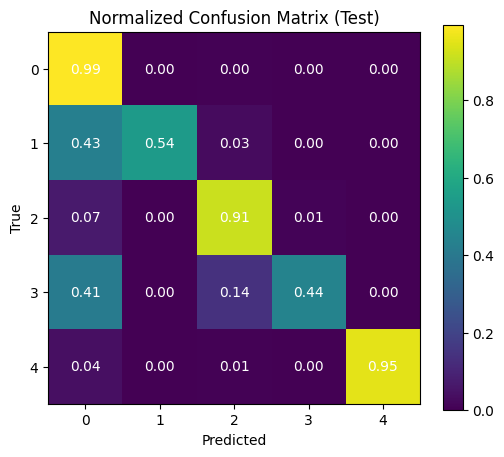

In [14]:
import numpy as np
import matplotlib.pyplot as plt

cm_norm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

plt.figure(figsize=(6,5))
plt.imshow(cm_norm)
plt.title("Normalized Confusion Matrix (Test)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.xticks(range(5))
plt.yticks(range(5))

# Annotate
for i in range(5):
    for j in range(5):
        plt.text(j, i, f"{cm_norm[i, j]:.2f}",
                 ha="center", va="center", color="white")

plt.show()

In [15]:
%cd /content
!rm -rf mlmed2026
!git clone https://github.com/hoangnghia1444/mlmed2026.git
%cd /content/mlmed2026
!ls


/content
Cloning into 'mlmed2026'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 4 (from 1)
Receiving objects: 100% (6/6), done.
/content/mlmed2026
README.md  report-template.tex
